In [140]:
import pandas as pd

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# PROPERTY OF NPR / DRAFT / NOT FOR PUBLICATION OR SHARING

# Purpose

This notebook shows how the VA staffing size has changed over the years. It also looks into whether choice hires did what they were supposed to do from our understanding - add new employees in addition to the usual increase.

# Importing The Data

In [141]:
df = pd.read_csv("../Staff_Size/Onboard_By_statyion_By_FY.csv").head(1).drop("ORGANIZATION",1)
choice_hires = pd.read_csv("../Hiring/Hiring_Clean_All_Positions.csv")

# How has staffing changed?

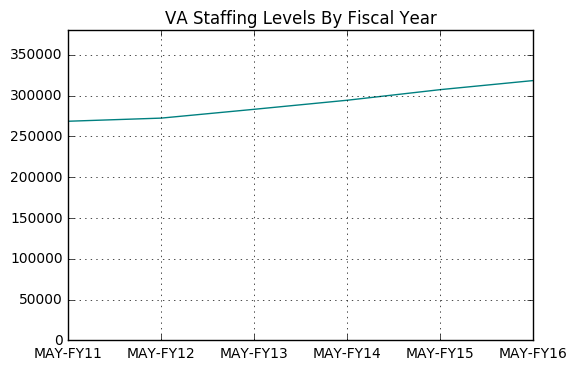

In [142]:
ax = df.transpose().plot(kind="line", color="teal")
ax.set_ylim(0,380000)
ax.set_title("VA Staffing Levels By Fiscal Year")
ax.legend_.remove()
ax.grid()

#ax.text(0.1, 1, 'PROPERTY OF NPR \n DRAFT \n NOT FOR PUBLICATION OR SHARING',
#         fontsize=17, color='black',
#        va='bottom',alpha=0.45)

## We can see here that staffing at the VA has increased year by year before and after the Veterans Access, Choice, and Accountability Act was passed on June 10th, 2014. We don't, however, see a larger increase in staffing levels after 2014. 

## Let's take a look at the increase each year. 

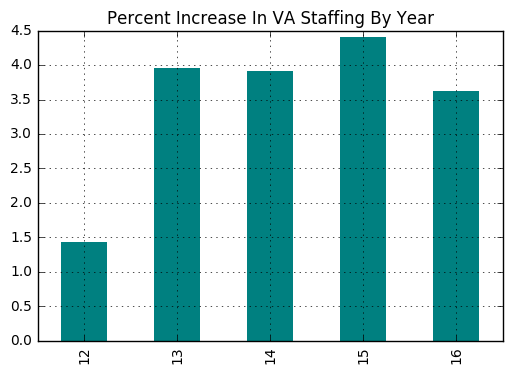

In [143]:
percent_increase_dict = {}

percent_increase_dict["12"] = ((df["MAY-FY12"] - df["MAY-FY11"])/df["MAY-FY11"])*100
percent_increase_dict["13"] = ((df["MAY-FY13"] - df["MAY-FY12"])/df["MAY-FY12"])*100
percent_increase_dict["14"] = ((df["MAY-FY14"] - df["MAY-FY13"])/df["MAY-FY13"])*100
percent_increase_dict["15"] = ((df["MAY-FY15"] - df["MAY-FY14"])/df["MAY-FY14"])*100
percent_increase_dict["16"] = ((df["MAY-FY16"] - df["MAY-FY15"])/df["MAY-FY15"])*100

percent_increase = pd.DataFrame.from_dict(percent_increase_dict)
percent_increase

ax = percent_increase.transpose().plot(kind="bar",color = ["teal","teal","teal","teal"], edgecolor="none")
ax.set_title("Percent Increase In VA Staffing By Year")
ax.legend_.remove()
ax.grid()
#ax.text(0.1, 1, 'PROPERTY OF NPR \n DRAFT \n NOT FOR PUBLICATION OR SHARING',
#         fontsize=17, color='black',
#        va='bottom',alpha=0.45)

## There was a modest jump in hirings in 2015, but the hirings dipped lower in 2016. It is possible many - if not all - of the extra hires were done in 2015, though that would only represent an extra .5 percentage point increase in one year of hiring. 

## What happens when we remove the employees that were hired under the choice act? Since these were supposed to be in addition to normal hires, 2015 and 2016 should still be seeing increases similar to 2013 and 2014. 

### Because I only have the current number of employees working for the VA because of choice act hires, not when they were hired, I will be looking at two year periods, instead of one year. 

#### Also important to note - I know the number of choice act hires currently working for the VA as of September 15th, 2016. This won't perfectly match up with the staffing numbers for May of each year, but should give us an idea of how choice hires related to staffing levels.

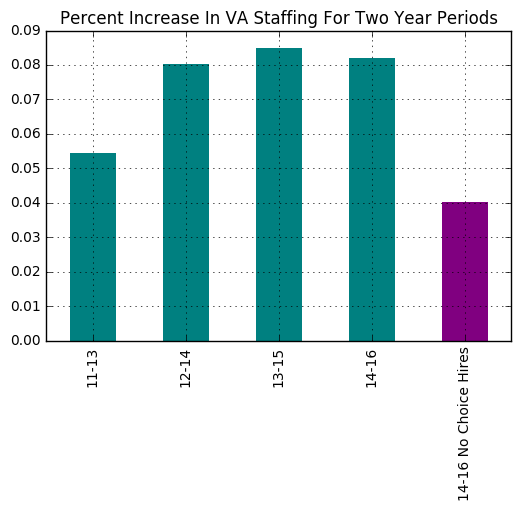

In [144]:
percent_increase_dict = {}

choice_hires_total = choice_hires["NbrEmps"].sum()

MAY_FY16_no_choice_hires = df["MAY-FY16"] - choice_hires_total

percent_increase_dict["11-13"] = (df["MAY-FY13"] - df["MAY-FY11"])/df["MAY-FY11"]
percent_increase_dict["12-14"] = (df["MAY-FY14"] - df["MAY-FY12"])/df["MAY-FY12"]
percent_increase_dict["13-15"] = (df["MAY-FY15"] - df["MAY-FY13"])/df["MAY-FY13"]
percent_increase_dict["14-16"] = (df["MAY-FY16"] - df["MAY-FY14"])/df["MAY-FY14"]
percent_increase_dict["14-16 No Choice Hires"] = (MAY_FY16_no_choice_hires - df["MAY-FY14"])/df["MAY-FY14"]

percent_increase = pd.DataFrame.from_dict(percent_increase_dict)
percent_increase

ax = percent_increase.transpose().plot(kind="bar",color = ["teal","teal","teal","teal","purple"], edgecolor="none")
ax.set_title("Percent Increase In VA Staffing For Two Year Periods")
ax.legend_.remove()
ax.grid()

#ax.text(0.1, .05, 'PROPERTY OF NPR \n DRAFT \n NOT FOR PUBLICATION OR SHARING',
#         fontsize=17, color='black',
#        va='bottom',alpha=0.45)

## As we can see, when choice hires were removed from 2016's staffing levels, the increase between 2014 and and 2016 was well below previous years. This would suggest that choice hires were often used in place of normal hires instead of addition to. 

#### Again, I couldn't see how the increase between 2013 and 2015 would have been affected with choice hires removed since I don't know what hires were from 2015. 

## Let's look at the raw numbers of hires added.

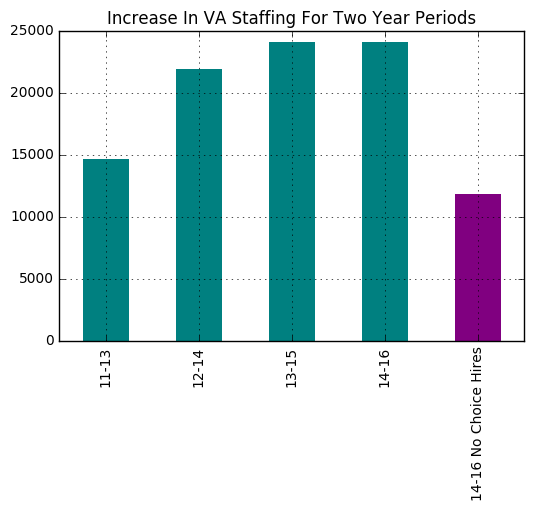

In [145]:
increase_dict = {}



increase_dict["11-13"] = (df["MAY-FY13"] - df["MAY-FY11"])
increase_dict["12-14"] = (df["MAY-FY14"] - df["MAY-FY12"])
increase_dict["13-15"] = (df["MAY-FY15"] - df["MAY-FY13"])
increase_dict["14-16"] = (df["MAY-FY16"] - df["MAY-FY14"])
increase_dict["14-16 No Choice Hires"] = (MAY_FY16_no_choice_hires - df["MAY-FY14"])

increase = pd.DataFrame.from_dict(increase_dict)

ax = increase.transpose().plot(kind="bar",color = ["teal","teal","teal","teal","purple"], edgecolor="none")
ax.set_title("Increase In VA Staffing For Two Year Periods")
ax.legend_.remove()
ax.grid()

#ax.text(0.1, .05, 'PROPERTY OF NPR \n DRAFT \n NOT FOR PUBLICATION OR SHARING',
#         fontsize=17, color='black',
#        va='bottom',alpha=0.45)

## Finally, let's not just look at staff increases, but staffing levels in general. 

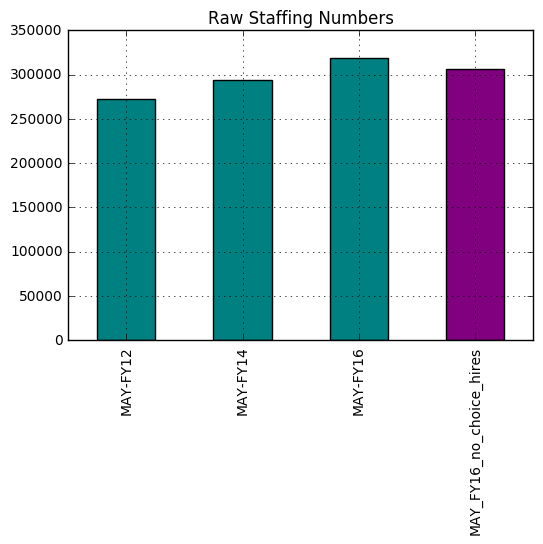

In [148]:
df["MAY_FY16_no_choice_hires"] = MAY_FY16_no_choice_hires

ax = df[["MAY-FY12","MAY-FY14","MAY-FY16","MAY_FY16_no_choice_hires"]].transpose().plot(kind='bar',color=['teal','teal','teal','purple'])
ax.legend_.remove()
ax.grid()


ax.set_title("Raw Staffing Numbers")
#ax.text(0.1, .05, 'PROPERTY OF NPR \n DRAFT \n NOT FOR PUBLICATION OR SHARING',
#         fontsize=17, color='black',
#        va='bottom',alpha=0.45)

,MAY-FY11,MAY-FY12,MAY-FY13,MAY-FY14,MAY-FY15,MAY-FY16,MAY_FY16_no_choice_hires
0,268699,272538.0,283338,294444,307430,318560,306252
